<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#lib-load" data-toc-modified-id="lib-load-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>lib load</a></span></li><li><span><a href="#Fi-ext-list" data-toc-modified-id="Fi-ext-list-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Fi ext list</a></span></li><li><span><a href="#Qubit-def" data-toc-modified-id="Qubit-def-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Qubit def</a></span></li></ul></li><li><span><a href="#Matrix-element" data-toc-modified-id="Matrix-element-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Matrix element</a></span></li><li><span><a href="#T1-eval" data-toc-modified-id="T1-eval-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>T1 eval</a></span></li><li><span><a href="#analytical-approach-to-ng-=-0" data-toc-modified-id="analytical-approach-to-ng-=-0-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>analytical approach to ng = 0</a></span><ul class="toc-item"><li><span><a href="#Dispersive-shift" data-toc-modified-id="Dispersive-shift-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dispersive shift</a></span></li></ul></li></ul></div>

assymetry
dispesive shift for e and 2e
T1


In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## lib load

In [109]:
%matplotlib widget

In [2]:
# %matplotlib inline
%load_ext autoreload
%autoreload 2


import matplotlib.pyplot as plt
import numpy as np

from ACqubit import *
from ACstate import *
from wavefunction1d import *

from tqdm import tqdm, tqdm_notebook
#from tqdm.autonotebook import tqdm

pi = np.pi

D:\anaconda\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


## Fi ext list

In [3]:
    Nfi_ext = 51
    fi_ext_min, fi_ext_max = [-0*pi, 1*pi]
    fi_ext_list = np.linspace(fi_ext_min, fi_ext_max, Nfi_ext)[1:-1]
    dfi_ext = ( fi_ext_max - fi_ext_min ) /Nfi_ext

## Qubit def

In [4]:


J1 = 33
J2 = 1*J1+13



ACQB15 = ACQubit (E_CL = 15, 
              E_L = 0.87, 
              E_J = (J1+J2)/2, 
              E_C = 8,
              dE_J = (J2-J1)/2 )

bands = [0,1,2]
  #  fig ,ax_spec, axes, axes2 = ACQB15.plot_bands_Psi(fi_ext_list = fi_ext_list, ng_list = [  0.5], bands = bands)    


In [4]:
J1 = 33
J2 = 1*J1+0
    
    
ACQB15_sym = ACQubit (E_CL = 15, 
                  E_L = 0.87, 
                  E_J = (J1+J2)/2, 
                  E_C = 8,
                  dE_J = (J2-J1)/2 )

In [9]:
J1 = 33
J2 = 1*J1+0
    
    
ACQB09 = ACQubit (E_CL = 7, 
                  E_L = 0.6, 
                  E_J = 51, 
                  E_C = 35,
                  dE_J = 33 )

In [69]:
ACQ_ = ACQubit (E_CL = 8, 
                  E_L = 0.8, 
                  E_J = 35, 
                  E_C = 7,
                  dE_J = 0 )

In [70]:
st0e = ACQ_.set_state(ng = 0, fi_ext = 0.5* 2*np.pi)
st1e = ACQ_.set_state(ng = 0.5, fi_ext = 0.5* 2*np.pi)
ng_list = np.linspace(0,1, 51)
sw0e = st0e.sweep('dE_J', np.linspace(0.1, 31,11))
sw1e = st1e.sweep('dE_J', np.linspace(0.1, 31,11))

In [71]:
ax = sw0e.plot('E_ij',  i = 0, j = 1)
sw1e.plot('E_ij', ax, i = 0, j = 1)

# axtw = ax.twinx()
# axtw.set_yscale('log')

ax = sw0e.plot('fi_ij',  i = 0, j = 1)
sw1e.plot('n_ij', ax, i = 0, j = 1)

ax.set_yscale('log')

e:\OneDrive - Rutgers University\files_GitHub\Bifluxon\ACstate.py:441: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


FigureCanvasNbAgg()

e:\OneDrive - Rutgers University\files_GitHub\Bifluxon\ACstate.py:441: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


FigureCanvasNbAgg()

In [107]:
Q =  ACQubit (E_CL = .15, 
                  E_L = 0.87, 
                  E_J = 200, 
                  E_C = 30,
                  dE_J = (J2-J1)/2 )

In [110]:
fig, ax = plt.subplots()

st = Q.set_state(ng = 0.5, fi_ext = 1.01*pi)

Psi_i,  Psi_j  = 1.41*st.get_Psi(band=0, q=3) , 1.41*st.get_Psi(band=1, q=3)


a = np.sqrt( 8*Q.E_CL / Q.E_J)

psi_gauss0 = 1/1.41/(a*pi)**0.25*exp(- st.fi_list**2/2/a )
psi_gauss1 = 1/1.41/(a*pi)**0.25*exp(- (st.fi_list - 2*pi)**2/2/a ) 

ax.plot(st.fi_list/2/pi, Psi_i)
ax.plot(st.fi_list/2/pi, Psi_j)

ax.plot(st.fi_list/2/pi, psi_gauss0, 'k--')
ax.plot(st.fi_list/2/pi, psi_gauss1, 'k--')


t = np.sum(Psi_i * Psi_j)
# print(t)

# np.sum(Psi_j * Psi_j)

FigureCanvasNbAgg()

D:\anaconda\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)



80.28841654342648


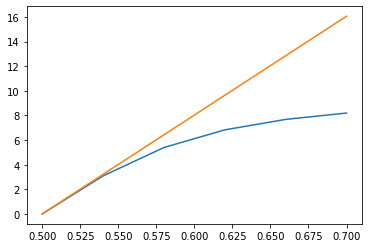

In [106]:
fig, ax = plt.subplots()



ng_list = np.linspace(0.5,0.7, 6)

E = Q.iterate_ng(  ng_list, pi, 'get_E_ij', 0,1)


dEq = 2*abs(t*4*Q.E_C)

print(dEq)

ax.plot(ng_list, E)
ax.plot(ng_list, dEq*(ng_list - 0.5))

# Matrix element

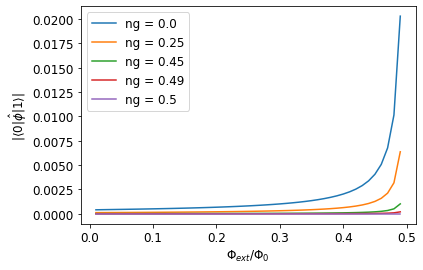

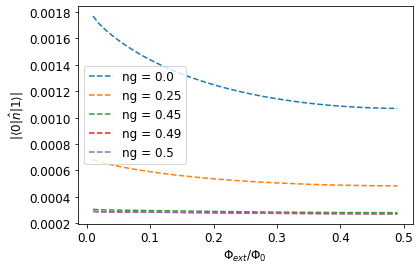

In [28]:
Q = ACQ_Ag
Q = ACQB15_sym
fig, ax = plt.subplots()

# ax = Q.plot_fi_ij(fi_ext_list ,  [  0.0, 0.25, 0.5 ], 0,1) 
# Q.plot_n_ij(fi_ext_list ,  [  0.0,.25, 0.45, 0.49, 0.5 ], 0,1, ax)
Q.plot_fi_ij(fi_ext_list ,  [  0.0,.25, 0.45, 0.49, 0.5 ], 0,1, ax)

Q.plot_n_ij(fi_ext_list ,  [  0.0,.25, 0.45, 0.49, 0.5 ], 0,1)
# ax.set_yscale('log')

In [85]:
J1 = 33
J2 = 2*J1+3

Q = ACQubit (E_CL = 7, 
              E_L = 0.6, 
              E_J = (J1+J2)/2, 
              E_C = 35,
              dE_J = (J2-J1)/2 )

st = Q.set_state(ng = 0.0 ,fi_ext = 0.25*2*np.pi)
st.get_n_ij(0,1)

0.00097853490187191187

In [12]:
Q1 = ACQubit (E_CL = 7, 
              E_L = 0.6, 
              E_J = (J1+J2)/2, 
              E_C = 35,
              dE_J = (J2-J1)/2 )

st = Q1.set_state(ng = 0.0 ,fi_ext = 0.25*2*np.pi)
st.get_n_ij(0,1)

# axes = []
# for i in range(st.Q_dim):
#     fig, ax = plt.subplots()
#     axes.append(ax)
    
# Q1.plot_Psi( axes, fi_ext = 0.25 *2*np.pi, ng = 0 ,  band = 0 )
# Q1.plot_Psi( axes, fi_ext = 0.25 *2*np.pi, ng = 0 ,  band = 1 )

3.2424421220894617e-18

<IPython.core.display.Javascript object>


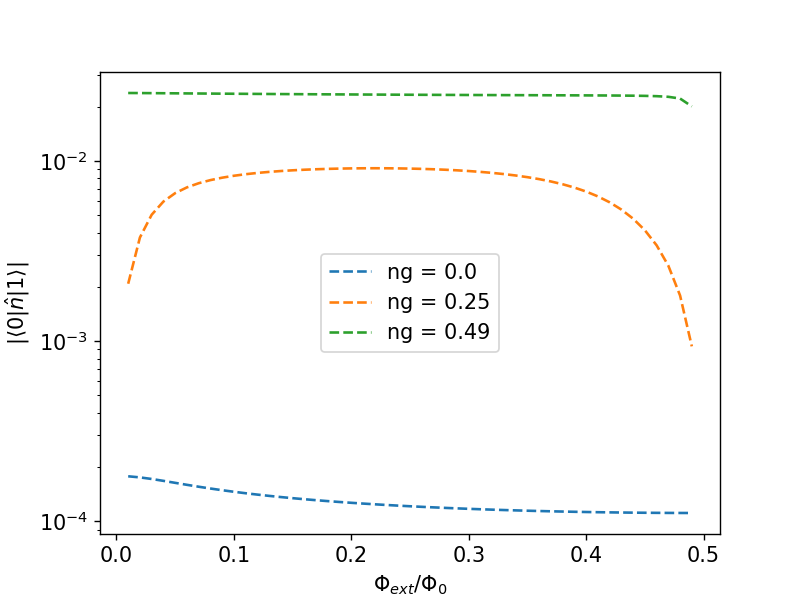

In [8]:
ax = ACQB15.plot_n_ij(fi_ext_list ,  [  0.0,0.25, 0.49 ], 0,1)
ax.set_yscale('log')

In [4]:
st = ACQB15.set_state(ng = 0.5 ,fi_ext = 0.25*2*np.pi)

<IPython.core.display.Javascript object>


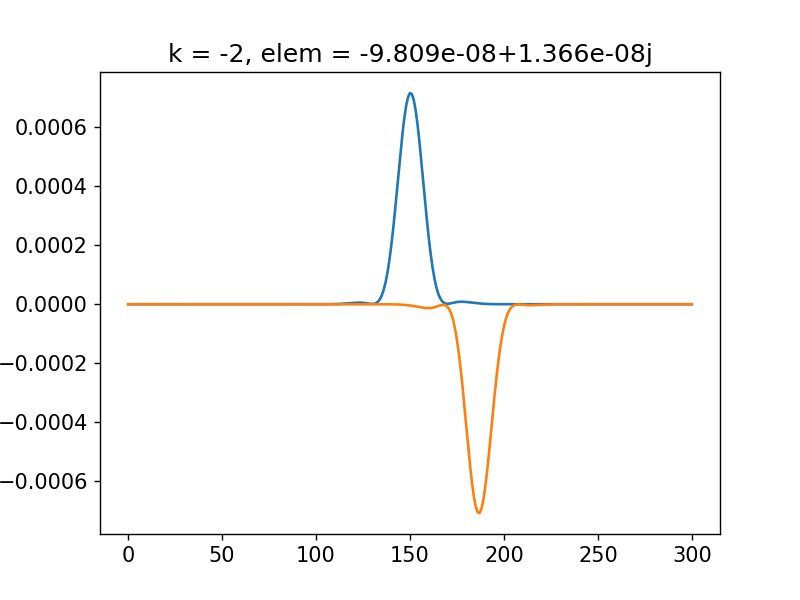

D:\anaconda\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<IPython.core.display.Javascript object>


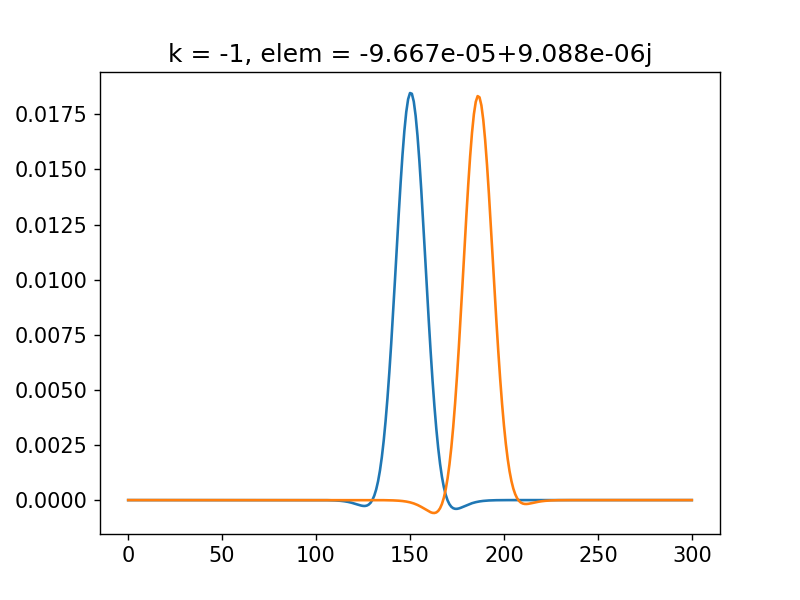

<IPython.core.display.Javascript object>


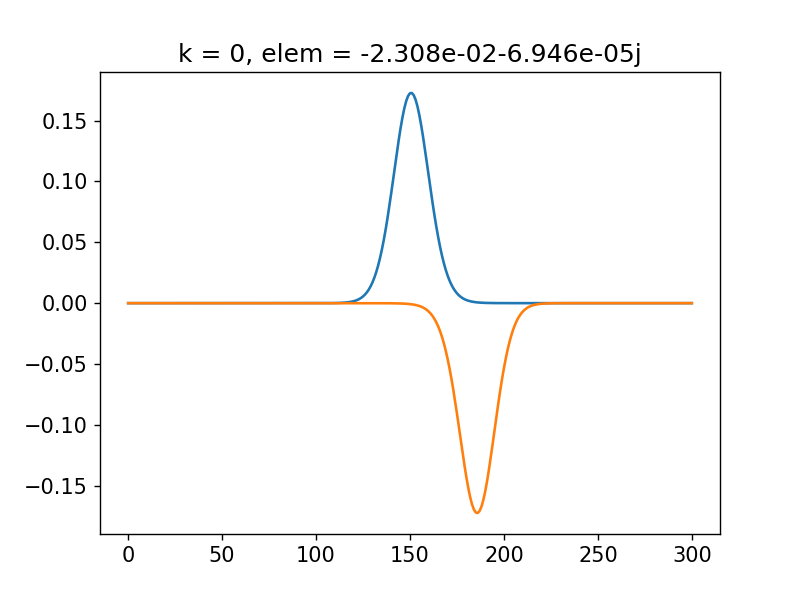

<IPython.core.display.Javascript object>


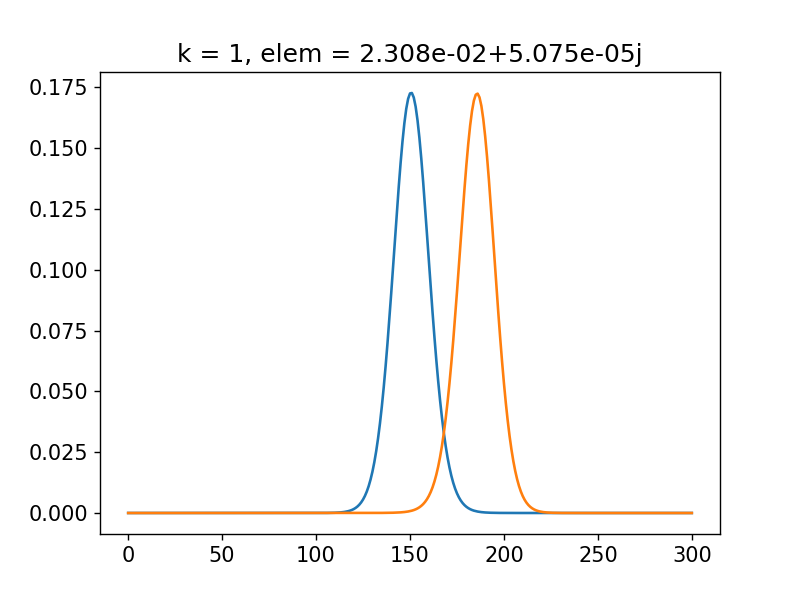

<IPython.core.display.Javascript object>


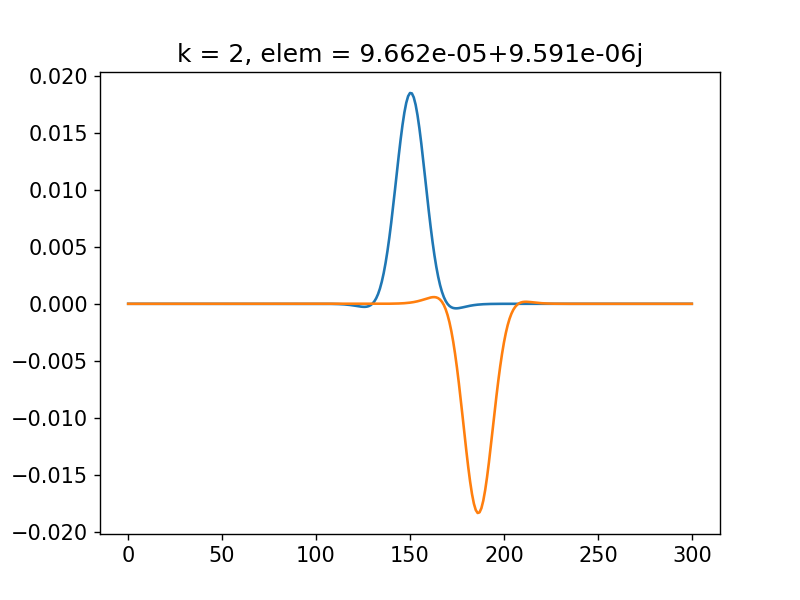

<IPython.core.display.Javascript object>


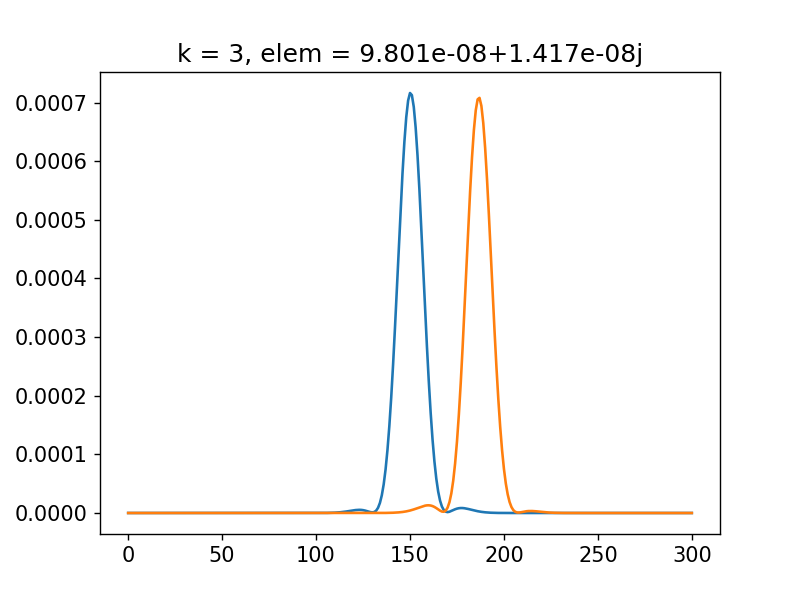

0.02336578822440448

In [9]:
st.get_n_ij(0,1, True)

# T1 eval

In [5]:
    def get_T1_phi(Q, fi_ext, ng, i = 0, j = 1):
 
        def Reff(w):
            A = 500e9 #/GHz
            return A/w

        st = Q.set_state(ng = ng,fi_ext = fi_ext)
        kT = 1 #GHz
        Rq = 6e3
        
        E = st.get_E()
        w = 2*pi*(E[j] - E[i])
        fi_ij = st.get_fi_ij(i, j)
        
#         return  1/(4*pi*Rq/Reff(w) * fi_ij**2*w*1e9/np.tanh(w/kT))    
#         return  1/( fi_ij**2* w**2 /np.tanh(w/kT))
        return 1/(   fi_ij**2*(w**2)*(0.9e9)**2 *(0.04e-6)**2 )   


    def get_T1_n(Q, fi_ext, ng, i = 0, j = 1):

        st = Q.set_state(ng = ng,fi_ext = fi_ext)
        E = st.get_E()
        w = (E[j] - E[i])
        n_ij = st.get_n_ij(i, j)
        fi_ij = st.get_fi_ij(i, j)
        
        return 1/( n_ij**2 * (w**2)*(7e9)**2 *(0.8e-6)**2 )    
    
    def get_T1(Q, fi_ext, ng, i = 0, j = 1):
 
       return 1/( 1/get_T1_phi(Q, fi_ext, ng, i = 0, j = 1) + 1/get_T1_n(Q, fi_ext, ng, i = 0, j = 1) )


In [ ]:
    T1_1 = []
    T1_0 = []
    
    Q = ACQB15_sym
    
    tfi_ext_list = tqdm(fi_ext_list)
    for fi_ext in tfi_ext_list:
        T1_0.append (get_T1(Q, fi_ext, 0, i = 0, j = 1))
        T1_1.append (get_T1(Q, fi_ext, 0.5, i = 0, j = 1))
        
    fig, ax = plt.subplots()

    ax.plot(fi_ext_list/2/pi,   T1_0, label = '0e')
    ax.plot(fi_ext_list/2/pi,   T1_1, label = '1e')
    
    ax.set_yscale('log')
    
    plt.legend()

<IPython.core.display.Javascript object>


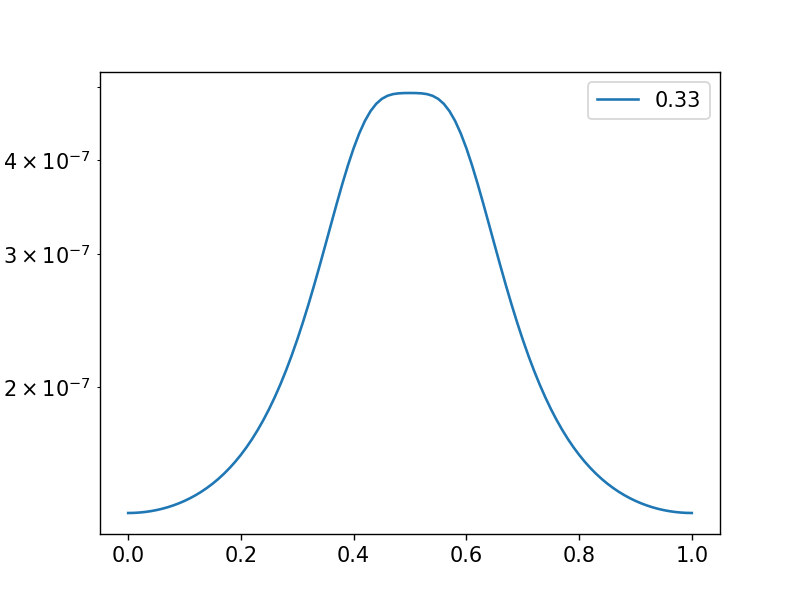

In [8]:
#     T1_1 = []
T1 = []

Q = ACQB15_sym

ng_list = np.linspace(0, 1, 101)
fi_ext = 0.4

tng_list = tqdm(ng_list)
for ng in tng_list:
#         T1_0.append (get_T1(Q, fi_ext, 0, i = 0, j = 1))
    T1.append (get_T1(Q, fi_ext, ng, i = 0, j = 1))

fig, ax = plt.subplots()

ax.plot( ng_list, T1, label = '0.33')
#     ax.plot(fi_ext_list/2/pi,   T1_1, label = '1e')

ax.set_yscale('log')

plt.legend()

<IPython.core.display.Javascript object>


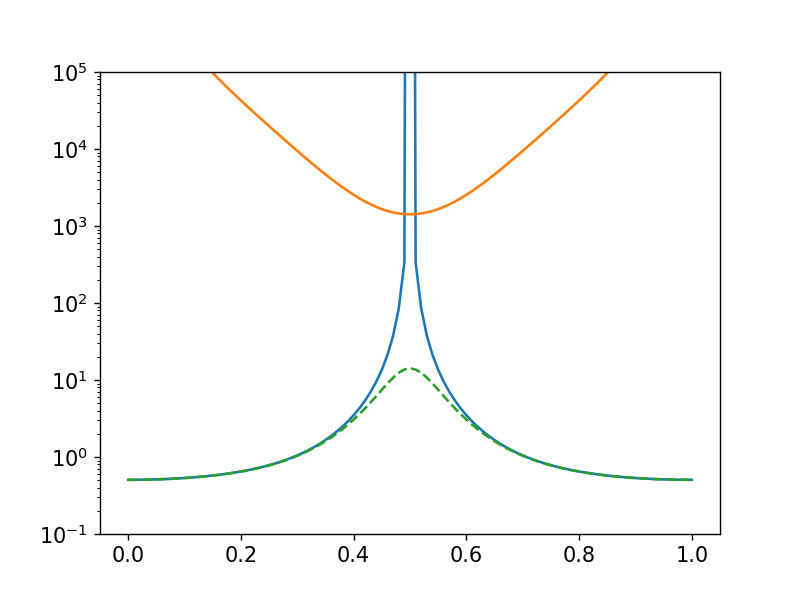

In [71]:
mel_fi= []
mel_n= []



for ng in tng_list:
    st = Q.set_state(fi_ext = 0.4, ng = ng)
    mel_fi.append (st.get_fi_ij( i = 0, j = 1))
    mel_n.append (st.get_n_ij( i = 0, j = 1))

    
fig, ax = plt.subplots()

ax.plot( ng_list, 1/np.array(mel_fi)**2, label = 'fi')
ax.plot( ng_list, 1/np.array(mel_n)**2, label = 'n')

ax.plot( ng_list, 1/(100*np.array(mel_n)**2 + np.array(mel_fi)**2 ), '--', label = 'sum')

ax.set_ylim([0.1,1e5])
ax.set_yscale('log')

In [6]:
fdir = 'E:\\OneDrive - Rutgers University\\files_py\\expdata\\ACQB15\\'
data = np.genfromtxt(fdir+ f'B15_T1vsV.dat')

Vg_2e = 2*0.55 

Vg = data[:,0]/Vg_2e
T1Vg = data[:,1]*1e-6

<IPython.core.display.Javascript object>


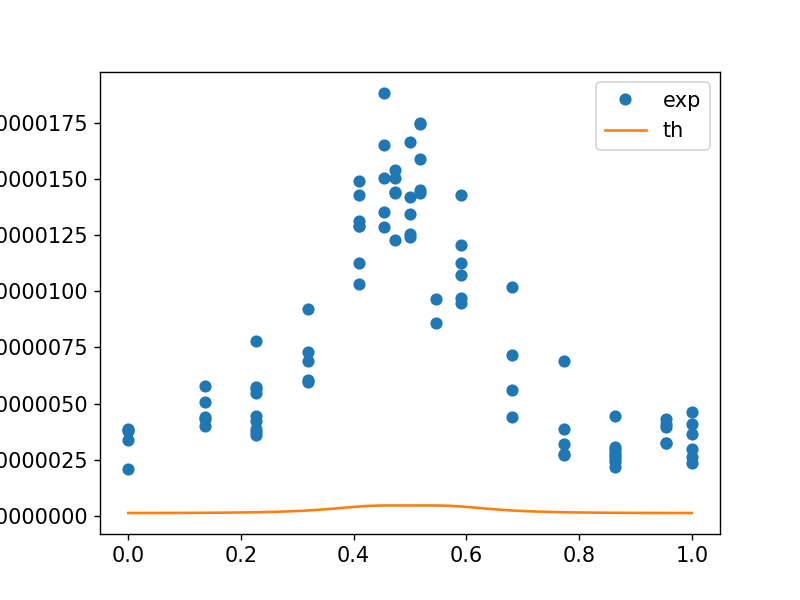

In [9]:
fig, ax = plt.subplots()

T1_th = []

ax.plot( Vg, T1Vg, 'o', label = 'exp')

for ng in tng_list:
    T1_th.append (get_T1(Q, 0.33, ng, i = 0, j = 1))
    
ax.plot( ng_list, T1_th, '-', label = 'th')

ax.legend()


In [ ]:
fig, ax = plt.subplots()
a = Q.plot_Psi([ax, ax, ax, ax], 0.0, 0,  0 )
b = Q.plot_Psi([ax, ax, ax, ax], 0.0, 0,  1 )

fi_list = np.linspace(-8*pi, 8*pi, 101)

np.abs(np.sum(a*b*fi_list))

In [ ]:
fi_list = np.linspace(-8*pi, 8*pi, 101)

q = 4

st = Q.set_state (0.5,0)
psi = st.get_Psi( band = 0, q =q)
psi1 = st.get_Psi( band = 1, q =q)

fig, ax = plt.subplots()
ax.plot(fi_list/2/np.pi, psi)
ax.plot(fi_list/2/np.pi, psi1)

In [ ]:
st = Q.set_state (0.5,0.45)
fi_ij = 0
st.get_WF(  )
for k in range(st.Q_dim):

    Psi_i = st.get_Psi(0, k)
    Psi_j = st.get_Psi(1, k)

    q = st.Q_list[k]
#            fi_ij += np.sum(Psi_i * Psi_j )

#     summ = np.sum(np.conjugate(Psi_i) * Psi_j * st.fi_list )
#     summ = np.sum( np.abs(Psi_i) * np.abs(Psi_j) * q )
    summ = np.sum( np.conjugate(Psi_i) * Psi_j * q )
    
    print( summ, q)
    fi_ij += summ

np.abs(fi_ij)

In [ ]:
    bands = [0,1,2,3,4]
    Q = ACQB15_sym
    fig ,ax_spec, axes, axes2 = Q.plot_bands_Psi(fi_ext_list = fi_ext_list, ng_list = [ 0, 0.49], bands = bands)    


In [ ]:
    Nfi_ext = 51
    fi_ext_min, fi_ext_max = [-0*pi, 1*pi]
    fi_ext_list = np.linspace(fi_ext_min, fi_ext_max, Nfi_ext)
    dfi_ext = ( fi_ext_max - fi_ext_min ) /Nfi_ext

    ACQB15 = ACQubit (E_CL = 10, 
                      E_L = 0.5, 
                      E_J = 10, 
                      E_C = 10,
                      dE_J = 0)
  
    bands = [0,1,2]
    ACQB15.plot_fi_ij(fi_ext_list ,  [  0, 0.25, 0.45, 0.49, 0.5 ], 0,1)    


# analytical approach to ng = 0




In [ ]:
    wp_list = [20,30, 40, 50]
    g_list = np.linspace (0.5, 3, 51 )
    E_L = 0.1
    dq = 0.01
    fi_ext = 0.1
    
    
    fig, ax = plt.subplots()  
    fig.suptitle('$E_{L}$ = %1.2f, $\\delta q = %1.2f$'%(E_L, dq))

    for wp in tqdm(wp_list):

        y_plot = []
        x_plot = []
    
        for g in tqdm(g_list) :
            E_CL = wp/g/np.sqrt(8)
            E_J = g*wp/np.sqrt(8)
            
            qubit =  ACQubit(E_CL = E_CL,
                E_L = E_L,
                E_J = E_J,
                E_C = 6.7/1,
                dE_J = 0)
            

            st = qubit.set_state(ng = 0.5 - dq, fi_ext = 0.1 )
            fiij = st.get_fi_ij(0,1)

            y_plot.append(fiij)
            x_plot.append(g)
            
        ax.plot(x_plot, y_plot, label = "%1.2f"% wp)
        ax.legend(title="$\\omega_{p}$, GHz")

        ax.set_yscale('log')
        ax.set_xlabel('$\\sqrt{E_J/E_{CL}}$')
        ax.set_ylabel(r'$|\langle 0| \hat{\phi}|1 \rangle|$')

In [ ]:
ACQB15 = ACQubit (E_CL = 10, 
                  E_L = 0.9, 
                  E_J = 35, 
                  E_C = 10 )

In [ ]:
Nfi_ext = 101
fi_ext_min, fi_ext_max = [-1, 1]
fi_ext_list = np.linspace(fi_ext_min, fi_ext_max, Nfi_ext)

fig, ax = ACQB15.plot_spectrum(fi_ext_list = fi_ext_list, ng_list = [0.5, 0], bands = [0,1,2,3,4,5])    



ax.axhline(  ACQB15.wpL , -1, 1, ls = ':', c = 'g')
ax.text(1.1, 1.0*ACQB15.wpL,  '$\sqrt{8E_LE_{CL}}$')

ax.plot(fi_ext_list, ACQB15.approx_0e(  fi_ext_list*2*pi ), 'k:', lw = 0.5 )


In [ ]:
for ng in np.linspace(0,0.5, 6):
    ACQB15.

In [ ]:
ACQ_PRL = ACQubit (E_CL = 5, 
                  E_L = 0.4, 
                  E_J = 6.25, 
                  E_C = 6.7 )


In [ ]:

fig, ax = ACQ_PRL.plot_spectrum(fi_ext_list = fi_ext_list, ng_list = [0.5, 0], bands = [0])    

ax.axhline(  ACQ_PRL.wpL , -1, 1, ls = ':', c = 'g')
ax.text(1.1, 1.0*ACQ_PRL.wpL,  '$\sqrt{8E_LE_{CL}}$')

ax.plot(fi_ext_list, ACQ_PRL.approx_0e(  fi_ext_list*2*pi ), 'k:', lw = 0.5 )


In [ ]:
1/ACQ_PRL.alpha

In [ ]:
ACQ_2 = ACQubit (E_CL = 5, 
                  E_L = 0.4, 
                  E_J = 6.25, 
                  E_C = 6.7 )


In [ ]:

fig, ax = ACQ_PRL.plot_spectrum(fi_ext_list = fi_ext_list, ng_list = [0.5, 0], bands = [0])    

ax.axhline(  ACQ_PRL.wpL , -1, 1, ls = ':', c = 'k')
ax.text(1.1, 1.0*ACQ_PRL.wpL,  '$\sqrt{8E_LE_{CL}}$')

ax.plot(fi_ext_list, ACQ_PRL.approx_0e(  fi_ext_list*2*pi ), 'k:', lw = 0.5 )


In [ ]:
ACQ_ = ACQubit (E_CL = 30, 
                  E_L = 0.9, 
                  E_J = 35, 
                  E_C = 30 )


In [ ]:

fig, ax = ACQ_.plot_spectrum(fi_ext_list = fi_ext_list, ng_list = [0.5, 0], bands = [0])    

ax.axhline(  ACQ_.wpL , -1, 1, ls = ':', c = 'g')
ax.text(1.1, 1.0*ACQ_.wpL,  '$\sqrt{8E_LE_{CL}}$')

ax.plot(fi_ext_list, ACQ_.approx_0e(  fi_ext_list*2*pi ), 'k:', lw = 0.5 )


In [ ]:
1/ACQ_.alpha

In [ ]:
ACQ_2 = ACQubit (E_CL = 10, 
                  E_L = 0.3, 
                  E_J = 35, 
                  E_C = 30 )


In [ ]:

fig, ax = ACQ_2.plot_spectrum(fi_ext_list = fi_ext_list, ng_list = [0.5, 0], bands = [0])    

ax.axhline(  ACQ_2.wpL , -1, 1, ls = ':', c = 'g')
ax.text(1.1, 1.0*ACQ_2.wpL,  '$\sqrt{8E_LE_{CL}}$')

ax.plot(fi_ext_list, ACQ_2.approx_0e(  fi_ext_list*2*pi ), 'k:', lw = 0.5 )


In [ ]:
1/ACQ_2.alpha

In [ ]:
alph = np.sqrt(E_L/8/E_CL)
Vper = -E_J**2/4/E_C
approx = np.sqrt(8*E_L*E_CL) + Vper*(2-1/2/alph)*np.exp(-1/4/alph)*np.cos(fi_ext_list*2*pi) 


plt.plot(fi_ext_list, approx)    


In [ ]:
for ng in [0, 0.5]:
    
    fiij = []

    tfi_ext_list = tqdm_notebook(fi_ext_list)
                            

    for fi_ext in tfi_ext_list:

        st = ACQB15.set_state(ng = ng,fi_ext = fi_ext*2*pi)

        fiij.append( st.get_fi_ij(0,1) )

    fiij = np.array( fiij)      
    plt.plot(fi_ext_list,  np.abs(fiij), label = f'ng = {ng}' )
    
plt.legend()

## Dispersive shift

In [107]:
from scipy.signal import savgol_filter

fdir = 'E:\\OneDrive - Rutgers University\\files_GitHub\\Bifluxon\\expdata\\ACQB15\\'
data = np.genfromtxt(fdir+ 'B15_disp_shift.dat')

fr_raw = data[0,1:-20]
B_raw = data[1: ,0]
S21 = data[1:,1:-20]

B = B_raw/120e-6
fr = 0*B_raw

# fig, ax = plt.subplots()
for i, line in enumerate(S21):
    
    window = int( len(line)/10 )
    try:
        S21_filered = savgol_filter(line, window, 2)
    except ValueError:
        S21_filered = savgol_filter(line, window+1, 2)    

    ind = argmax(S21_filered)
    
    fr[i] = fr_raw[ind]
#     ax.plot(fr_raw, line,'o')

    
fig, ax = plt.subplots()
ax.plot(B [90:-90], fr[90:-90],'-o')


np.savetxt('res_fr_vs_Flux.txt', np.transpose([B [90:-90], fr[90:-90]]), fmt='%.3e',  header="Flux (Phi0), res freq (GHz)")

D:\anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


FigureCanvasNbAgg()